# General Equilibrium Model and cvxpy
Remember that there is a tutorial for cvxpy at http://www.cvxpy.org/tutorial/index.html

## Step 1. Use cvxpy for solving a simple utility maximization problem
    Two goods, x and y, in positive quantities. Utility is x^.5 + y^.5 and budget constraint x + y <= 1. Symmetric problem hence we expect symmetric solution.

In [2]:
import cvxpy as cvx

# Create two scalar optimization variables.
x = cvx.Variable()
y = cvx.Variable()

# Create two constraints.
constraints = [x+y <= 1, x >= 0, y >= 0]

# Form objective (make sure you minimize a concave function or maximize a convex function).
obj = cvx.Maximize(x**.5 + y**.5)

# Form and solve problem.
prob = cvx.Problem(obj, constraints)
prob.solve() 

# Returns the optimal value. 
print ("status:", prob.status)
print ("optimal objective", prob.value)
print ("optimal variables", x.value, y.value)

status: optimal
optimal objective 1.4142135591833325
optimal variables 0.49999999885240887 0.4999999988524107


## Step 2. Introduce a price parameter in the budget constraint.
       By solving the same maximization problem for a list of values of the parameter (namely, p, the relative price of good x) we obtain a list of values for optimal consumption of each good, denoted x_demand and y_demand.
    We can then plot x_demand versus its price p, and y_demand versus 1/p.

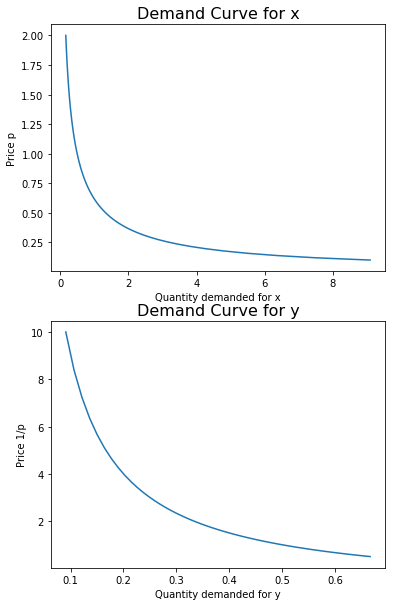

In [4]:
import cvxpy as cvx
import numpy
import matplotlib.pyplot as plt

# Create two scalar optimization variables and one parameter.
x = cvx.Variable()
y = cvx.Variable()
p = cvx.Parameter()

# Include the parameter in the budget constraint.
constraints = [p*x+y <= 1, x >= 0, y >= 0]
# Form objective.
obj = cvx.Maximize(x**.5 + y**.5)

# Define the problem.
prob = cvx.Problem(obj, constraints)

# Construct the demand curve from the solution to the problem.
# All values are stored in lists for easy plotting.
Prices=[]
Prices_Inverse=[]
x_demand=[]
y_demand=[]

# numpy.linspace creates a list of evenly spaced numbers (990 different prices) between two bounds (2 and 100).
p_vals = numpy.linspace(.1, 2, 100)

for val in p_vals:
    p.value = val
    prob.solve()
    Prices.append(val)
    Prices_Inverse.append(1/val)
    x_demand.append(x.value)
    y_demand.append(y.value)

# Plot the demand for good x vs its price p
plt.figure(figsize=(6,10))
plt.subplot(211)
plt.plot(x_demand,Prices)
plt.xlabel('Quantity demanded for x')
plt.ylabel('Price p')
plt.title('Demand Curve for x', fontsize=16)

# plot the demand for good y vs 1/p
plt.subplot(212)
plt.plot(y_demand, Prices_Inverse)
plt.ylabel('Price 1/p')
plt.xlabel('Quantity demanded for y')
plt.title('Demand Curve for y', fontsize=16)
plt.show()


### Step 3. Use cvxpy for solving a simple profit maximization problem, with single parameter (the wage rate).
    We generate an exogenous list of wages and solve the firm's problem for each value of the wage rate, thus generating a list of corresponding profits, output, employment that are profit maximizing given the wage rate.

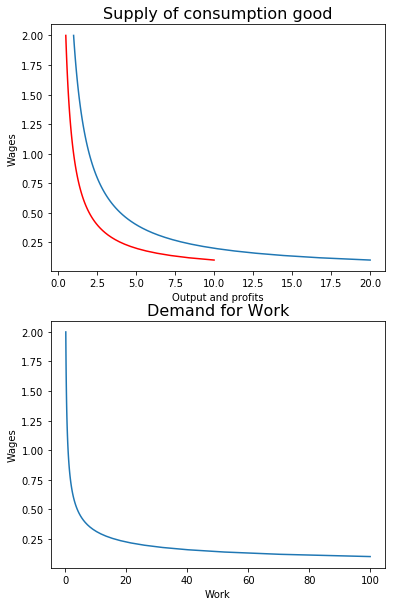

In [78]:
import cvxpy as cvx
import matplotlib.pyplot as plt
import numpy

# Create two scalar optimization variables and one parameter
y = cvx.Variable() # output
n = cvx.Variable() # work
w = cvx.Parameter() # Wage rate

# Include parameter in objective
obj = cvx.Maximize(y - w*n)

# Production constraint
constraints = [y <= 2*n**.5, y >=0, n >=0]

# Define the problem
prob = cvx.Problem(obj, constraints)

# Construct demand/supply curves
# Initial Lists
Wages = []
y_supply = []
n_demand = []
profits_supply = []

# numpy.linspace creates a list of evenly spaced numbers (40 here) between two bounds
w_vals = numpy.linspace(.1, 2, 100)

for val in w_vals:
    w.value = val # wage rate takes the value = val
    prob.solve()
    Wages.append(val)
    y_supply.append(y.value)
    n_demand.append(n.value)
    profits_supply.append(prob.value)

# Plot both demand curves
plt.figure(figsize=(6,10))
plt.subplot(211)
plt.plot(y_supply,Wages)
plt.plot(profits_supply, Wages, 'r')
plt.xlabel('Output and profits')
plt.ylabel('Wages')
plt.title('Supply of consumption good', fontsize=16)

plt.subplot(212)
plt.plot(n_demand,Wages)
plt.ylabel('Wages')
plt.xlabel('Work')
plt.title('Demand for Work', fontsize=16)
plt.show()

In [29]:
# Follow up on the previous step: plot output as a function ?


1.9

### Step 4. Utility maximization problem with parameter as the wage rate and corresponding profits derived from profit maximization

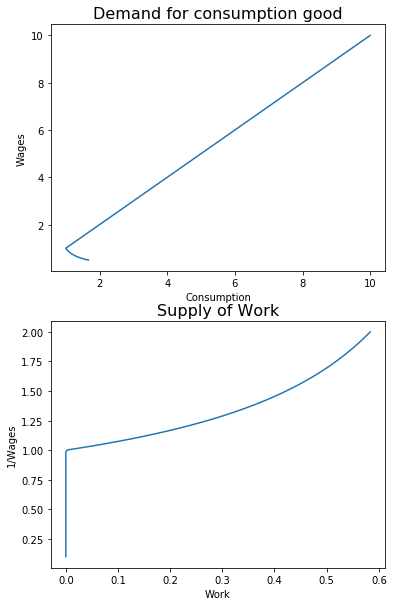

In [79]:
import cvxpy as cvx
import numpy
import matplotlib.pyplot as plt

# Create two scalar optimization variables and one parameter.
c = cvx.Variable() # consumption
l = cvx.Variable() # leisure
w = cvx.Parameter() # wage rate
prof = cvx.Parameter() # profits

# Include the parameter in the budget constraint.
constraints = [c + w*l <= w + prof, c >= 0, l >= 0, l <=1]
# Form objective
obj = cvx.Maximize(c**.5 + l**.5)

# Define the problem.
prob = cvx.Problem(obj, constraints)

# Construct the demand curve from the solution to the problem.

# All values are stored in lists for easy plotting.
Wages=[]
Wages_Inverse=[]
c_demand=[]
w_supply=[]
# numpy.linspace creates a list of evenly spaced numbers (40 here) between two bounds.
w_vals = numpy.linspace(.1, 2, 100).tolist()

i = 0

while i<100:
    w.value = w_vals[i] # wage rate takes the correct value
    prof.value = profits_supply[i] # corresponding profits from firm's problem
    prob.solve()
    Wages.append(w.value)
    Wages_Inverse.append(1/w.value)
    c_demand.append(c.value)
    w_supply.append(1 - l.value)
    i += 1

# Plot both demand/supply curves.
plt.figure(figsize=(6,10))
plt.subplot(211)
plt.plot(c_demand,Wages_Inverse)
plt.xlabel('Consumption')
plt.ylabel('Wages')
plt.title('Demand for consumption good', fontsize=16)

plt.subplot(212)
plt.plot(w_supply,Wages)
plt.ylabel('1/Wages')
plt.xlabel('Work')
plt.title('Supply of Work', fontsize=16)
plt.show()


In [64]:
Wages

[0.1,
 0.1191919191919192,
 0.1383838383838384,
 0.1575757575757576,
 0.17676767676767677,
 0.19595959595959594,
 0.21515151515151515,
 0.23434343434343433,
 0.2535353535353535,
 0.2727272727272727,
 0.2919191919191919,
 0.3111111111111111,
 0.3303030303030303,
 0.3494949494949495,
 0.3686868686868686,
 0.3878787878787878,
 0.407070707070707,
 0.42626262626262623,
 0.44545454545454544,
 0.46464646464646464,
 0.48383838383838385,
 0.503030303030303,
 0.5222222222222221,
 0.5414141414141413,
 0.5606060606060606,
 0.5797979797979798,
 0.598989898989899,
 0.6181818181818182,
 0.6373737373737373,
 0.6565656565656565,
 0.6757575757575757,
 0.6949494949494949,
 0.7141414141414141,
 0.7333333333333333,
 0.7525252525252525,
 0.7717171717171717,
 0.7909090909090909,
 0.81010101010101,
 0.8292929292929292,
 0.8484848484848484,
 0.8676767676767676,
 0.8868686868686868,
 0.906060606060606,
 0.9252525252525252,
 0.9444444444444443,
 0.9636363636363635,
 0.9828282828282827,
 1.002020202020202,
 1.021

### Step 5. Superimpose supply/demand curves in both markets

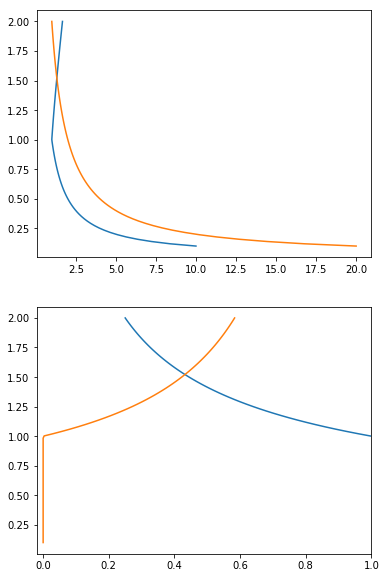

In [80]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6,10))

plt.subplot(211)
plt.plot(c_demand, Wages)
plt.plot(y_supply, Wages)

plt.subplot(212)
plt.plot(n_demand, Wages)
plt.plot(w_supply, Wages)
plt.xlim(-.02,1)

plt.show()


### Step 5 (cont.). Find the equilibrium wage rate.

In [83]:
# Generate the excess demand
excess_demand=np.subtract(n_demand, w_supply).tolist()

# Find positions where excess demand changes sign (position 'a')
a = excess_demand.index(min(filter(lambda x:x>0,excess_demand)))
# Read corresponding 2 wages for a first estimate
Wagesnew= numpy.linspace(Wages[a], Wages[a+1],20).tolist()

In [84]:
Wagesnew

[1.52020202020202,
 1.521212121212121,
 1.5222222222222221,
 1.523232323232323,
 1.5242424242424242,
 1.525252525252525,
 1.5262626262626262,
 1.5272727272727271,
 1.5282828282828282,
 1.5292929292929291,
 1.5303030303030303,
 1.5313131313131312,
 1.5323232323232323,
 1.5333333333333332,
 1.5343434343434343,
 1.5353535353535352,
 1.5363636363636364,
 1.5373737373737373,
 1.5383838383838384,
 1.5393939393939393]

In [73]:
Wages

array([1.52020202, 1.52121212, 1.52222222, 1.52323232, 1.52424242,
       1.52525253, 1.52626263, 1.52727273, 1.52828283, 1.52929293,
       1.53030303, 1.53131313, 1.53232323, 1.53333333, 1.53434343,
       1.53535354, 1.53636364, 1.53737374, 1.53838384, 1.53939394])